In [18]:
!pip install scikit_posthocs

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import scikit_posthocs as sp



In [21]:
eda_data = pd.read_csv('/content/hard_fix_september_11_2024.csv')

# Filter dataset for Colorado
colorado_data = eda_data[eda_data['State'] == 'Colorado']

In [22]:
# Convert Year and Month into a datetime object for easier time-series analysis
colorado_data['Date'] = pd.to_datetime(colorado_data['Year'].astype(str) + '-' + colorado_data['Month'], format='%Y-%B')


<ipython-input-22-af2dcee4de74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colorado_data['Date'] = pd.to_datetime(colorado_data['Year'].astype(str) + '-' + colorado_data['Month'], format='%Y-%B')


In [23]:
# Define periods
pre_covid = colorado_data[(colorado_data['Year'] >= 2018) & (colorado_data['Year'] <= 2019)]
covid = colorado_data[colorado_data['Year'] == 2020]
post_covid = colorado_data[(colorado_data['Year'] >= 2021) & (colorado_data['Year'] <= 2022)]


In [24]:
# Ensure data completeness
def clean_data(df):
    return df.dropna(subset=['Total Disconnections', 'Disconnection Rate'])

pre_covid_clean = clean_data(pre_covid)
covid_clean = clean_data(covid)
post_covid_clean = clean_data(post_covid)


In [25]:
# Combine into a single dataframe with labels
pre_covid_clean['Period'] = 'Pre-COVID'
covid_clean['Period'] = 'COVID'
post_covid_clean['Period'] = 'Post-COVID'

combined_data = pd.concat([pre_covid_clean, covid_clean, post_covid_clean])


<ipython-input-25-2f8998b56bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_clean['Period'] = 'Pre-COVID'
<ipython-input-25-2f8998b56bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_clean['Period'] = 'COVID'
<ipython-input-25-2f8998b56bd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [26]:
# Hypothesis Testing (Kruskal-Wallis H Test)
disconnection_rate_groups = [
    pre_covid_clean['Disconnection Rate'],
    covid_clean['Disconnection Rate'],
    post_covid_clean['Disconnection Rate']
]
kruskal_stat, kruskal_p = kruskal(*disconnection_rate_groups)


In [27]:
# Pairwise comparisons (Dunn's Test)
dunn_results = sp.posthoc_dunn(combined_data, val_col='Disconnection Rate', group_col='Period', p_adjust='bonferroni')


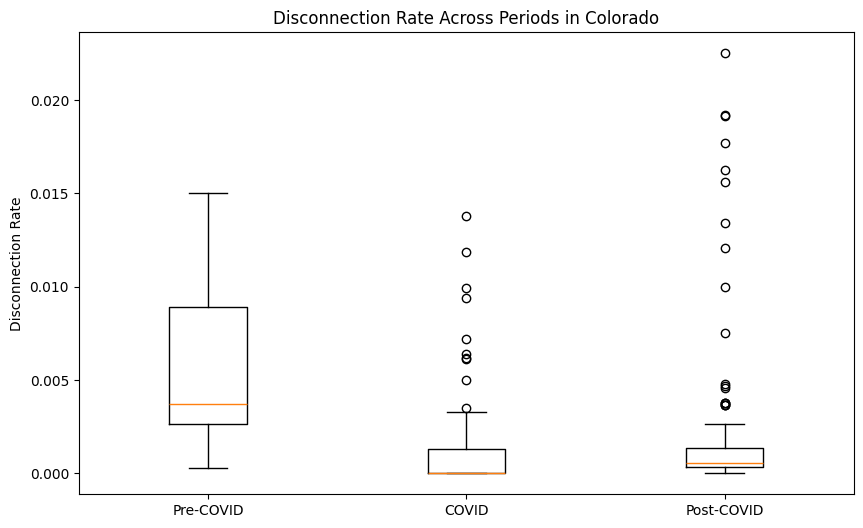

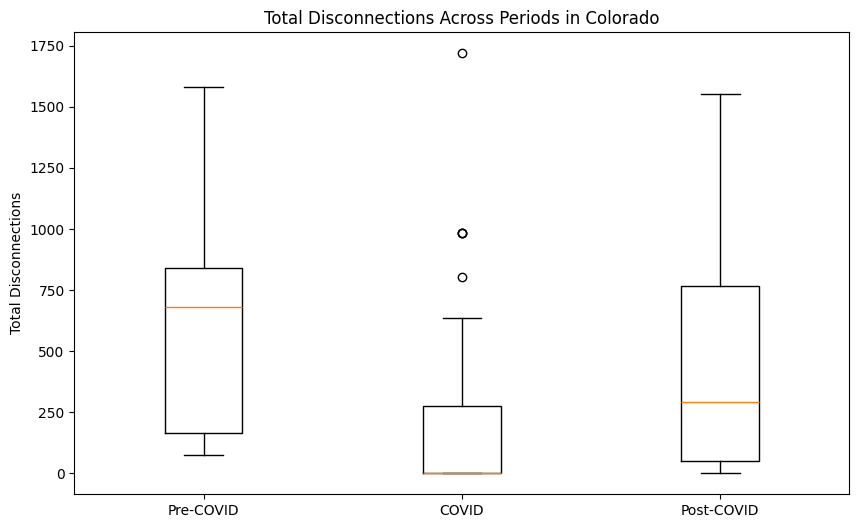

In [28]:
# Visualizations
plt.figure(figsize=(10, 6))
plt.boxplot(
    [pre_covid_clean['Disconnection Rate'], covid_clean['Disconnection Rate'], post_covid_clean['Disconnection Rate']],
    labels=['Pre-COVID', 'COVID', 'Post-COVID']
)
plt.title('Disconnection Rate Across Periods in Colorado')
plt.ylabel('Disconnection Rate')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(
    [pre_covid_clean['Total Disconnections'], covid_clean['Total Disconnections'], post_covid_clean['Total Disconnections']],
    labels=['Pre-COVID', 'COVID', 'Post-COVID']
)
plt.title('Total Disconnections Across Periods in Colorado')
plt.ylabel('Total Disconnections')
plt.show()


In [29]:

# Results Summary
results_summary = {
    "Kruskal-Wallis H Test": {"Statistic": kruskal_stat, "p-value": kruskal_p},
    "Dunn's Test Results": dunn_results
}


In [30]:
# Display insights
print("Kruskal-Wallis Test Results:")
print(f"Statistic: {kruskal_stat}, p-value: {kruskal_p}")
print("\nDunn's Test Results:")
print(dunn_results)

Kruskal-Wallis Test Results:
Statistic: 90.99097481157227, p-value: 1.744057777249363e-20

Dunn's Test Results:
                   COVID    Post-COVID     Pre-COVID
COVID       1.000000e+00  3.758817e-03  1.728064e-19
Post-COVID  3.758817e-03  1.000000e+00  2.489778e-11
Pre-COVID   1.728064e-19  2.489778e-11  1.000000e+00
